## SciPy pour Scientific Python

SciPy enrichit NumPy sur lequel il s'appuie. Il offre entre autre des outils

  * de statistique
  * d'optimisation
  * l'intégration numérique
  * de calcul matriciel
  * de transformation de Fourier
  * de traitement du signal
  * de traitement d'image
  * de résolution d'équations différentielles
    

### Integrales

Pour intégrer numériquement une fonction entre deux points, on peut utiliser `integrate.quad` de Scipy :

In [16]:
from scipy import integrate

def f(x):
    return x**2

print integrate.quad(f,0,2)
print 2**3/3.      # à comparer à x³/3 en x = 2

(2.666666666666667, 2.960594732333751e-14)
2.66666666667


La seconde valeur retournée par `quad` est l'estimation de l'erreur.

#### Fonction lambda

Il existe un racourci pour définir une fonction, raccourci qui plaira aux matheux et qui est bien pratique quand on doit donner une fonction en argument. Pour cela on utilise le mot clef `lambda` :

In [17]:
f = lambda x : x**2  # la même chose que la définition de f à la cellule précédente, mais on préfère utiliser def
f(4)

16

--------

Ainsi on peut calculer directement notre intégrale double avec <a href="http://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.dblquad.html">`dblquad`</a>

$$ \int_{-2}^{2} \; \int_{-2}^x \; y\; dy\; dx $$

In [18]:
integrate.dblquad(lambda y,x : y, -2, 2, lambda x:-2, lambda x:x)

# Attention : on donne f(y,x) et non f(x,y) par contre les bornes sont bien en x puis en y !

(-5.333333333333334, 5.921189464667502e-14)

Notons qu'ici l'usage des `lambda` est justifié puisqu'il s'agit de définir une fonction à la volée.

#### Tracer l'intégrale avec "cumulative trapèzes"

En cumulant les intégrales de 0 à $\epsilon$, de $\epsilon$ à $2 \epsilon$... on obtient un tableau de valeur de la fonction intégrée qui permet de la tracer 

$$
f(x) = \int x^2 \, dx
$$

In [19]:
from scipy import integrate

x = linspace(0, 4, num=20)
y = x**2
y_int = integrate.cumtrapz(y, x)   # on intègre x² entre 0 et 4
plot(x[1:], y_int, 'r',label=u"calulée", linewidth=3)
plot(x, y[0] + x**3/3., 'w--', label=u"exacte", linewidth=2)

leg =legend()
frame  = leg.get_frame()    # on récupère le rectangle de la légende
frame.set_facecolor('0.90') # pour le colorier

NameError: name 'linspace' is not defined

In [28]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt


x = np.linspace(0, 4, num=20)
y = x**2
y_int = integrate.cumtrapz(y, x)   # on intègre x² entre 0 et 4
plt.plot(x[1:], y_int, 'r',label=u"calulée", linewidth=3)
plt.plot(x, y[0] + x**3/3., 'w--', label=u"exacte", linewidth=2)

leg =plt.legend()
frame  = leg.get_frame()    # on récupère le rectangle de la légende
frame.set_facecolor('0.90') # pour le colorier

### Résolution d'équations différentielles

Ce module permet de calculé la solution d'une équation différentielle du type :

$$ y'(t) = f(y(t),t)$$

In [23]:
from scipy.integrate import odeint
import numpy as np

def f(y,t):
    return y

t = np.arange(0,5,0.1)
res = odeint(f, 1, t)  # 1 est la valeur de la solution pour le premier point
plot(t,res,linewidth=3)
plot(t,exp(t),'--w')

NameError: name 'plot' is not defined

#### Étude paramétrique

Imaginons que l'on désire faire une étude paramétrique de la résolution de $y' = a \; y + b\quad$ avec a et b qui varient, on va transférer
les paramètres à notre fonctions en ajoutant des arguments et en indiquant à `odeint` qu'il y a des arguments supplémentaires.

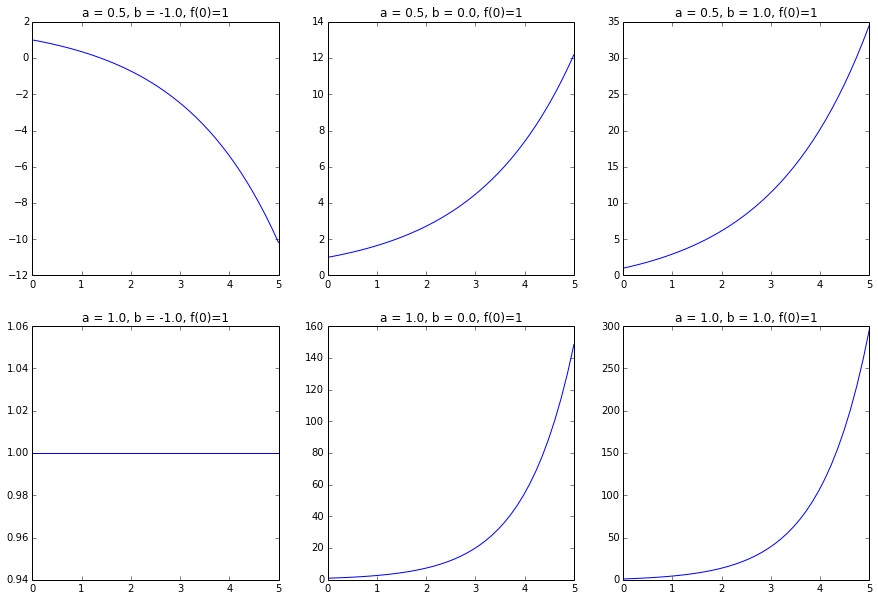

In [27]:
def g(y,t,a,b):
    return a*y + b

figure(figsize=(15,10), dpi=100)
t = linspace(0,5,40)
k = 1
for a in [0.5,1]:       # 2 valeurs pour a
    for b in [-1,0,1]:   # 3 valeurs pour b, cf subplot ci-dessous
      res = odeint(g, 1, t, args=(a,b))  # ce qui est dans args est passé à la fonction après les arguments y et t
      ax = subplot(230+k, title="a = %.1f, b = %.1f, f(0)=1" % (a,b))
      ax.plot(t,res)
      k += 1

#### Équation différentielle linéaire d'ordre 2

Enfin y et t peuvent être des vecteurs ce qui permet de résoudre des équations de dégré supérieur. Essayons de résoudre
l'oscillation amortie du masse au bout d'un ressort :

$$y''(t) + \nu y'(t) + \omega^2 y(t) = 0$$

avec le vecteur $Y = (y,y')$. Cela donne le système :

$$
\begin{align}
Y[0]' & = Y[1] \newline
Y[1]' & = -\nu Y[1] - \omega^2\; Y[0]
\end{align}
$$

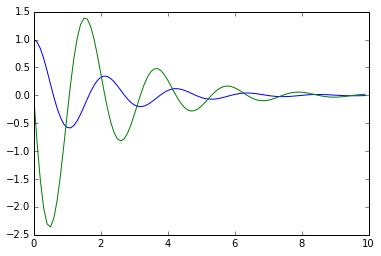

In [28]:
def f(Y, t, mu, omega):
    return Y[1], -mu * Y[1] - omega**2 * Y[0]

t = arange(0,10,0.1)
res = odeint(f, (1,0), t, args=(1,3)) # valeurs initiale : y=1, y'=0
plot(t,res)  # res a 2 tableaux résultats, y et y', donc deux courbes sont dessinée